In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn


Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("All libraries imported successfully")


All libraries imported successfully


In [3]:
import os

# create a main folder named "airaware_project"
os.makedirs("airaware_project", exist_ok=True)

print("Folder created successfully ")


Folder created successfully 


In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv("airaware_project/city_hour.csv")

# Show first 5 rows
df.head()


,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01 01:00:00,NaN,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,0.0,0.0,0.0,NaN,NaN
1,Ahmedabad,2015-01-01 02:00:00,NaN,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,0.0,0.0,0.0,NaN,NaN
2,Ahmedabad,2015-01-01 03:00:00,NaN,NaN,0.08,19.32,11.08,NaN,0.08,52.83,NaN,0.0,0.0,0.0,NaN,NaN
3,Ahmedabad,2015-01-01 04:00:00,NaN,NaN,0.30,16.45,9.20,NaN,0.30,39.53,153.58,0.0,0.0,0.0,NaN,NaN
4,Ahmedabad,2015-01-01 05:00:00,NaN,NaN,0.12,14.90,7.85,NaN,0.12,32.63,NaN,0.0,0.0,0.0,NaN,NaN


In [5]:
# Check rows & columns
print("Shape of dataset:", df.shape)

# Check data types and missing values
df.info()


Shape of dataset: (707875, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707875 entries, 0 to 707874
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   City        707875 non-null  object 
 1   Datetime    707875 non-null  object 
 2   PM2.5       562787 non-null  float64
 3   PM10        411138 non-null  float64
 4   NO          591243 non-null  float64
 5   NO2         590753 non-null  float64
 6   NOx         584651 non-null  float64
 7   NH3         435333 non-null  float64
 8   CO          621358 non-null  float64
 9   SO2         577502 non-null  float64
 10  O3          578667 non-null  float64
 11  Benzene     544229 non-null  float64
 12  Toluene     487268 non-null  float64
 13  Xylene      252046 non-null  float64
 14  AQI         578795 non-null  float64
 15  AQI_Bucket  578795 non-null  object 
dtypes: float64(13), object(3)
memory usage: 86.4+ MB


In [6]:
# Step 9: Convert Datetime to proper format and sort
df['Datetime'] = pd.to_datetime(df['Datetime'], errors='coerce')

# Drop any rows where Datetime couldn't be converted
df = df.dropna(subset=['Datetime'])

# Sort the dataset by City and Datetime
df = df.sort_values(['City', 'Datetime']).reset_index(drop=True)

print("Datetime converted & dataset sorted successfully")
df.head()


Datetime converted & dataset sorted successfully


,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01 01:00:00,NaN,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,0.0,0.0,0.0,NaN,NaN
1,Ahmedabad,2015-01-01 02:00:00,NaN,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,0.0,0.0,0.0,NaN,NaN
2,Ahmedabad,2015-01-01 03:00:00,NaN,NaN,0.08,19.32,11.08,NaN,0.08,52.83,NaN,0.0,0.0,0.0,NaN,NaN
3,Ahmedabad,2015-01-01 04:00:00,NaN,NaN,0.30,16.45,9.20,NaN,0.30,39.53,153.58,0.0,0.0,0.0,NaN,NaN
4,Ahmedabad,2015-01-01 05:00:00,NaN,NaN,0.12,14.90,7.85,NaN,0.12,32.63,NaN,0.0,0.0,0.0,NaN,NaN


In [7]:
# Check how many values are missing in each column
df.isnull().sum().sort_values(ascending=False)


Xylene        455829
PM10          296737
NH3           272542
Toluene       220607
Benzene       163646
PM2.5         145088
SO2           130373
O3            129208
AQI           129080
AQI_Bucket    129080
NOx           123224
NO2           117122
NO            116632
CO             86517
City               0
Datetime           0
dtype: int64

In [8]:
# Step 10B: Handle missing values

#  Drop columns with too many missing values (more than 40%)
missing_percent = df.isnull().mean() * 100
cols_to_drop = missing_percent[missing_percent > 40].index
df = df.drop(columns=cols_to_drop)
print("Dropped columns:", list(cols_to_drop))

# Fill missing values for each city using forward and backward fill
df = df.groupby('City').apply(lambda group: group.ffill().bfill()).reset_index(drop=True)

#  Check again if any nulls remain
print("\nRemaining missing values after cleaning:")
print(df.isnull().sum())


Dropped columns: ['PM10', 'Xylene']

Remaining missing values after cleaning:
City              0
Datetime          0
PM2.5             0
NO                0
NO2               0
NOx           28025
NH3           48192
CO                0
SO2               0
O3             3852
Benzene       65433
Toluene       96049
AQI               0
AQI_Bucket        0
dtype: int64


In [9]:
# Step 10C: Final cleanup

# Fill remaining missing numeric values with column median
for col in ['NOx', 'NH3', 'O3', 'Benzene', 'Toluene']:
    df[col] = df[col].fillna(df[col].median())

# Double-check
print("Missing values after final cleaning:")
print(df.isnull().sum())


Missing values after final cleaning:
City          0
Datetime      0
PM2.5         0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
AQI           0
AQI_Bucket    0
dtype: int64


In [10]:
# Step 10D: Save the cleaned dataset
# Save the cleaned dataset
cleaned_path = "airaware_project/city_hour_cleaned.csv"
df.to_csv(cleaned_path, index=False)

print("Cleaned dataset saved successfully at:", cleaned_path)


Cleaned dataset saved successfully at: airaware_project/city_hour_cleaned.csv


In [11]:
# Step 11A: Statistical summary
df.describe(include='all')


,City,Datetime,PM2.5,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
count,707875,707875,707875.000000,707875.000000,707875.000000,707875.000000,707875.000000,707875.000000,707875.000000,707875.000000,707875.000000,707875.000000,707875.000000,707875
unique,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
top,Ahmedabad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Satisfactory
freq,48192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,245109
mean,NaN,2018-05-14 02:41:03.445098752,72.551384,20.717126,26.600508,34.050100,23.846128,2.335015,21.872225,34.099526,3.387807,7.491035,166.343795,NaN
min,NaN,2015-01-01 01:00:00,0.010000,0.010000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,8.000000,NaN
25%,NaN,2017-04-15 23:00:00,23.250000,3.780000,8.940000,10.560000,7.930000,0.400000,4.910000,11.530000,0.040000,0.360000,74.500000,NaN
50%,NaN,2018-08-04 20:00:00,46.000000,8.270000,17.640000,20.510000,15.570000,0.810000,8.550000,24.050000,0.740000,2.000000,114.000000,NaN
75%,NaN,2019-09-02 14:00:00,82.790000,18.670000,33.790000,37.230000,33.590000,1.420000,17.000000,46.340000,2.430000,6.060000,219.000000,NaN
max,NaN,2020-07-01 00:00:00,999.990000,499.990000,499.510000,498.610000,499.970000,498.570000,199.960000,497.620000,498.070000,499.400000,3133.000000,NaN


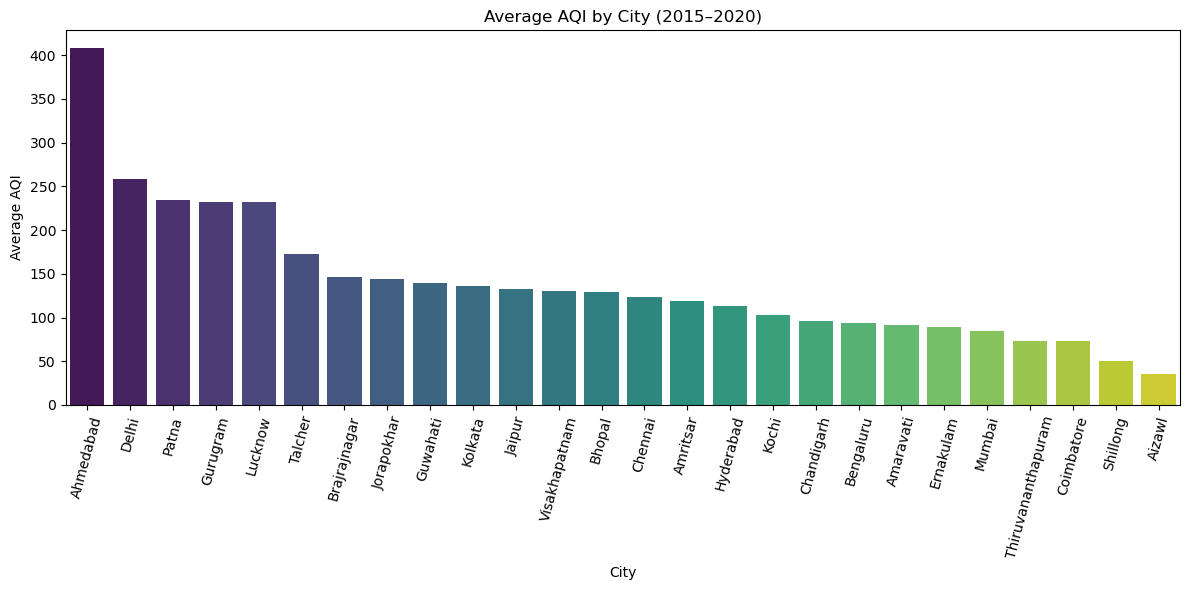

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 11B: Average AQI by city
plt.figure(figsize=(12,6))
city_aqi = df.groupby('City')['AQI'].mean().sort_values(ascending=False)

sns.barplot(x=city_aqi.index, y=city_aqi.values, palette="viridis")
plt.xticks(rotation=75)
plt.title("Average AQI by City (2015–2020)")
plt.ylabel("Average AQI")
plt.xlabel("City")
plt.tight_layout()
plt.show()


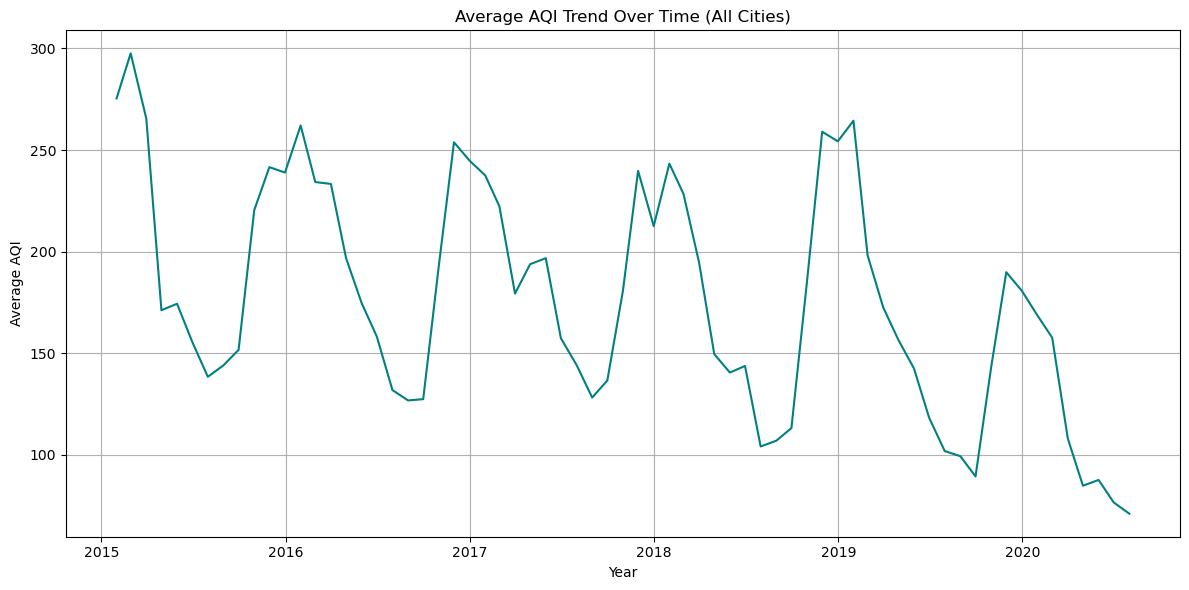

In [13]:
import matplotlib.dates as mdates

# Step 11C: AQI trend over time (all cities combined)
plt.figure(figsize=(12,6))

# Create a monthly average AQI to make the plot cleaner
monthly_aqi = df.resample('M', on='Datetime')['AQI'].mean()

plt.plot(monthly_aqi.index, monthly_aqi.values, color='teal')
plt.title("Average AQI Trend Over Time (All Cities)")
plt.xlabel("Year")
plt.ylabel("Average AQI")
plt.grid(True)

# Format x-axis to show years
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.tight_layout()
plt.show()


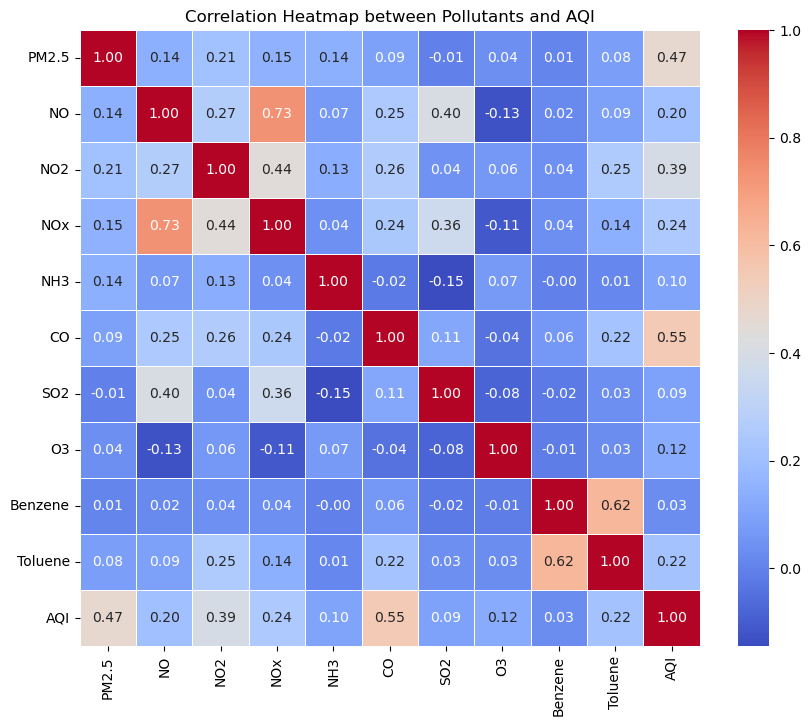

In [14]:
# Step 11D: Correlation between pollutants and AQI
plt.figure(figsize=(10,8))

# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlations
corr = numeric_df.corr()

# Plot heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap between Pollutants and AQI")
plt.show()


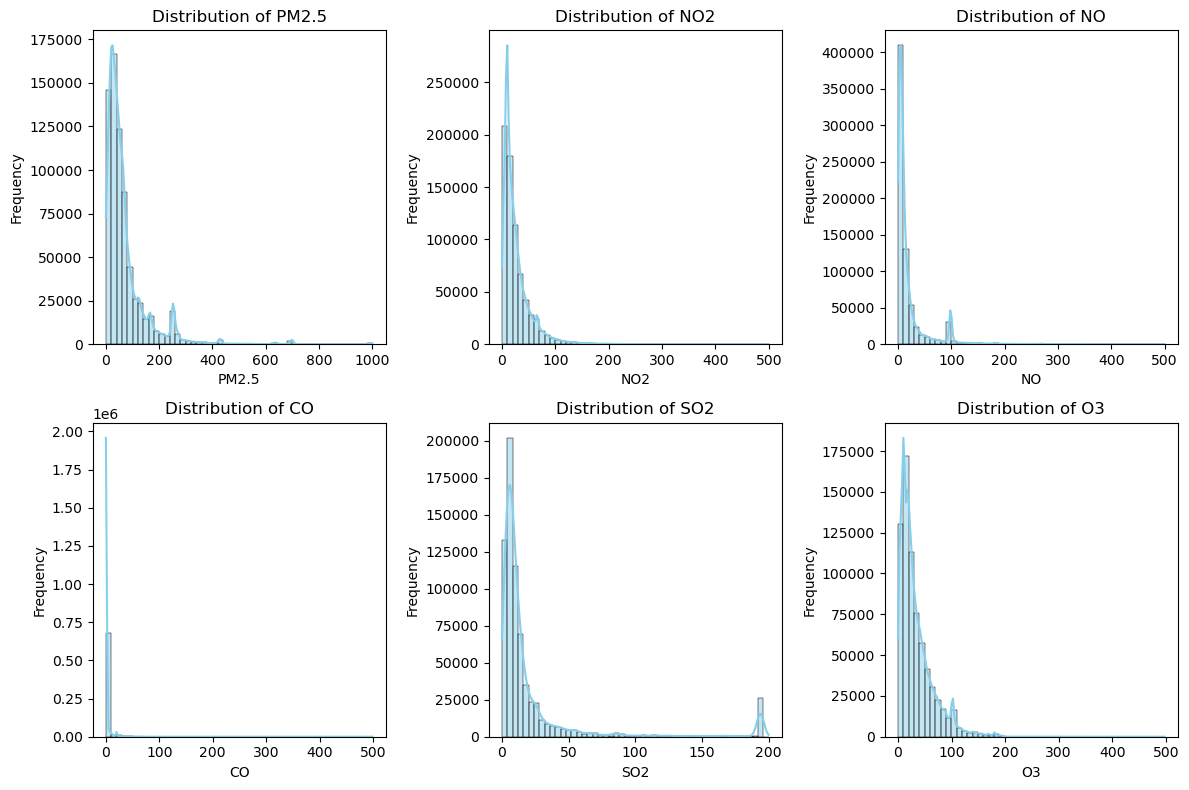

In [15]:
# Step 11E (fixed): Distribution of major pollutants that still exist
plt.figure(figsize=(12,8))

# Updated pollutant list (removed PM10)
pollutants = ['PM2.5', 'NO2', 'NO', 'CO', 'SO2', 'O3']

for i, col in enumerate(pollutants, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], bins=50, kde=True, color='skyblue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()



In [16]:
# Step 12A: Cap outliers using 1st and 99th percentile

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    lower_limit = df[col].quantile(0.01)
    upper_limit = df[col].quantile(0.99)
    df[col] = df[col].clip(lower_limit, upper_limit)

print("Outliers capped at 1st and 99th percentile for all numeric columns.")


Outliers capped at 1st and 99th percentile for all numeric columns.


In [17]:
final_path = "airaware_project/city_hour_final.csv"
df.to_csv(final_path, index=False)
print("Final dataset saved at:", final_path)


Final dataset saved at: airaware_project/city_hour_final.csv


In [18]:
# Step 11A: Statistical summary
df.describe(include='all')


,City,Datetime,PM2.5,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
count,707875,707875,707875.000000,707875.000000,707875.000000,707875.000000,707875.000000,707875.000000,707875.000000,707875.000000,707875.000000,707875.000000,707875.000000,707875
unique,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
top,Ahmedabad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Satisfactory
freq,48192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,245109
mean,NaN,2018-05-14 02:41:03.445098752,70.497993,19.968887,26.064389,33.316831,23.234526,1.842900,21.873627,33.869857,2.339695,6.634436,161.396132,NaN
min,NaN,2015-01-01 01:00:00,0.190000,0.330000,0.130000,0.000000,0.790000,0.000000,0.440000,0.580000,0.000000,0.000000,28.000000,NaN
25%,NaN,2017-04-15 23:00:00,23.250000,3.780000,8.940000,10.560000,7.930000,0.400000,4.910000,11.530000,0.040000,0.360000,74.500000,NaN
50%,NaN,2018-08-04 20:00:00,46.000000,8.270000,17.640000,20.510000,15.570000,0.810000,8.550000,24.050000,0.740000,2.000000,114.000000,NaN
75%,NaN,2019-09-02 14:00:00,82.790000,18.670000,33.790000,37.230000,33.590000,1.420000,17.000000,46.340000,2.430000,6.060000,219.000000,NaN
max,NaN,2020-07-01 00:00:00,428.300000,175.960000,137.872600,200.447800,129.510000,29.365200,193.860000,148.820000,32.260000,74.250400,605.000000,NaN


In [19]:
################################MILESTONE-2##################################

In [30]:
# STEP 1 — pick target and create time-based train/test split (no modeling yet)
import pandas as pd
from pathlib import Path

# 1) load cleaned CSV (you uploaded it earlier)
csv_path = "airaware_project/city_hour_final.csv"   # <- keep this unless your filename is different
assert Path(csv_path).exists(), f"File not found: {csv_path}"

df = pd.read_csv(csv_path)

# 2) show basic info so we both confirm what's inside
print("Full shape:", df.shape)
print("Columns:", df.columns.tolist())

# 3) ensure datetime and set as index
# Your file has a column named 'Datetime' (capital D). Convert to datetime.
df['datetime'] = pd.to_datetime(df['Datetime'], errors='coerce')
print("Datetime parse - missing values:", df['datetime'].isna().sum())

# drop rows missing datetime (if any) and set index (keeps original df unchanged otherwise)
df = df.dropna(subset=['datetime']).sort_values('datetime').reset_index(drop=True)
df = df.set_index('datetime')

# 4) choose target for forecasting
# Change this to 'PM2.5' if you prefer; default is 'AQI' since milestone focuses on air quality.
target_col = 'AQI'
if target_col not in df.columns:
    # fallback: choose first numeric column
    numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
    print("AQI not found. Numeric columns available:", numeric_cols[:10])
    target_col = numeric_cols[0]
print("Target selected:", target_col)

# 5) quick target stats to see distribution (helps later)
print("\nTarget summary:")
print(df[target_col].describe())
# 6) Create train/test split (chronological)
# Use last 10% of rows as test (time series rule)
n_total = len(df)
test_size = int(n_total * 0.10)
train_df = df.iloc[:-test_size].copy()
test_df = df.iloc[-test_size:].copy()

print("\nRows total:", n_total)
print("Train rows:", len(train_df))
print("Test rows:", len(test_df))

# 7) show the time range of train and test (VERY IMPORTANT)
print("\nTrain range:", train_df.index[0], "to", train_df.index[-1])
print("Test range :", test_df.index[0], "to", test_df.index[-1])

# 8) Save these small objects to disk so next steps can load them quickly (optional but convenient)
train_df.to_parquet("airaware_project/train_df_step1.parquet")
test_df.to_parquet("airaware_project/test_df_step1.parquet")
print("\nSaved train_df_step1.parquet and test_df_step1.parquet in /mnt/data")

# 9) Final minimal outputs to paste back here
display_df_head = df[[target_col]].head(6)
display_df_tail = df[[target_col]].tail(6)
print("\n-- First 6 rows of target column --")
print(display_df_head)
print("\n-- Last 6 rows of target column --")
print(display_df_tail)


Full shape: (707875, 14)
Columns: ['City', 'Datetime', 'PM2.5', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'AQI', 'AQI_Bucket']
Datetime parse - missing values: 0
Target selected: AQI

Target summary:
count    707875.000000
mean        161.396132
std         118.974673
min          28.000000
25%          74.500000
50%         114.000000
75%         219.000000
max         605.000000
Name: AQI, dtype: float64

Rows total: 707875
Train rows: 637088
Test rows: 70787

Train range: 2015-01-01 01:00:00 to 2020-03-09 12:00:00
Test range : 2020-03-09 12:00:00 to 2020-07-01 00:00:00

Saved train_df_step1.parquet and test_df_step1.parquet in /mnt/data

-- First 6 rows of target column --
                       AQI
datetime                  
2015-01-01 01:00:00  288.0
2015-01-01 01:00:00  333.0
2015-01-01 01:00:00  456.0
2015-01-01 01:00:00  605.0
2015-01-01 01:00:00   72.0
2015-01-01 01:00:00   82.0

-- Last 6 rows of target column --
              AQI
datetime         
2

In [32]:
# STEP 2 — create lag and rolling mean features

import pandas as pd

# reload data saved from Step 1 (so we keep continuity)
train_df = pd.read_parquet("airaware_project/train_df_step1.parquet")
test_df  = pd.read_parquet("airaware_project/test_df_step1.parquet")

target_col = 'AQI'

# combine train+test temporarily to make lag features continuous across the split
df_all = pd.concat([train_df, test_df])

# create 24 lag features (1 to 24 hours back)
for lag in range(1, 25):
    df_all[f'lag_{lag}'] = df_all[target_col].shift(lag)

# rolling means (3, 6, 12, 24 hours)
df_all['roll_mean_3']  = df_all[target_col].shift(1).rolling(3).mean()
df_all['roll_mean_6']  = df_all[target_col].shift(1).rolling(6).mean()
df_all['roll_mean_12'] = df_all[target_col].shift(1).rolling(12).mean()
df_all['roll_mean_24'] = df_all[target_col].shift(1).rolling(24).mean()

# also add simple time features
df_all['hour']      = df_all.index.hour
df_all['dayofweek'] = df_all.index.dayofweek
df_all['month']     = df_all.index.month

# drop rows with NaN values caused by lagging (normal)
df_all = df_all.dropna().copy()

print("After feature creation, shape:", df_all.shape)
print("Example columns now:", list(df_all.columns[:12]))

# split again into train/test (same ratio, last 10%)
n = len(df_all)
test_size = int(n * 0.10)
train_df2 = df_all.iloc[:-test_size].copy()
test_df2  = df_all.iloc[-test_size:].copy()

print("Train shape:", train_df2.shape, "Test shape:", test_df2.shape)

# Save for next step
train_df2.to_parquet("airaware_project/train_df_step2.parquet")
test_df2.to_parquet("airaware_project/test_df_step2.parquet")
print("\nSaved train_df_step2.parquet and test_df_step2.parquet.")


After feature creation, shape: (707851, 45)
Example columns now: ['City', 'Datetime', 'PM2.5', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene']
Train shape: (637066, 45) Test shape: (70785, 45)

Saved train_df_step2.parquet and test_df_step2.parquet.


Training on 43373 points, testing on 4819 points for Delhi


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                    AQI   No. Observations:                43373
Model:                 ARIMA(1, 1, 1)   Log Likelihood             -154297.389
Date:                Tue, 21 Oct 2025   AIC                         308600.778
Time:                        19:38:47   BIC                         308626.811
Sample:                    01-01-2015   HQIC                        308608.987
                         - 12-13-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7298      0.007    106.079      0.000       0.716       0.743
ma.L1         -0.5468      0.007    -74.295      0.000      -0.561      -0.532
sigma2        72.0376      0.064   1118.835      0.0

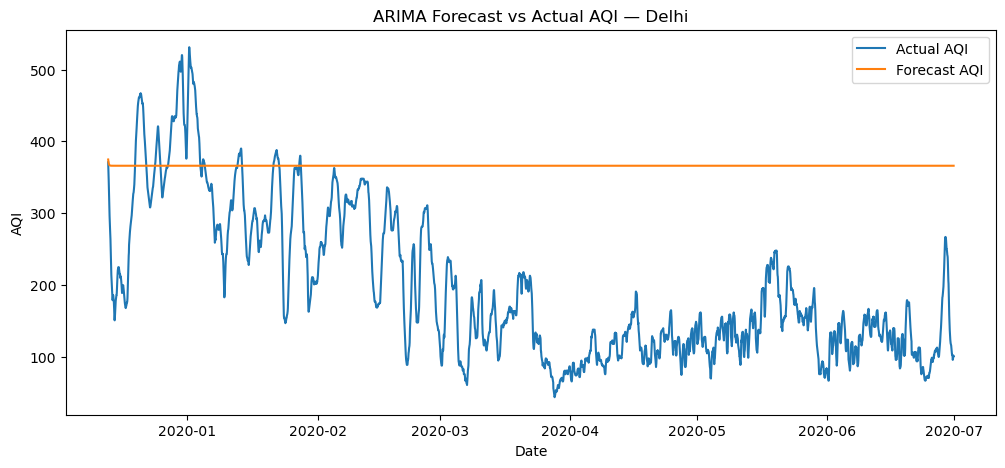

In [22]:
# STEP 3A — Train and evaluate ARIMA model for AQI forecasting

import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Load the full dataset (we need continuous time series for ARIMA)
df = pd.read_csv("airaware_project/city_hour_final.csv")
df['datetime'] = pd.to_datetime(df['Datetime'], errors='coerce')
df = df.dropna(subset=['datetime']).sort_values('datetime')
df = df.set_index('datetime')

# For simplicity, choose one city to model (e.g., Delhi)
city_name = "Delhi"
df_city = df[df['City'] == city_name].copy()

if df_city.empty:
    print(f"No rows for city '{city_name}'. Try another city from:", df['City'].unique()[:10])
else:
    # Use AQI as target
    target_col = 'AQI'
    series = df_city[target_col].dropna()

    # Split into train/test (last 10% for test)
    n = len(series)
    test_size = int(n * 0.1)
    train, test = series.iloc[:-test_size], series.iloc[-test_size:]

    print(f"Training on {len(train)} points, testing on {len(test)} points for {city_name}")

    # Fit ARIMA(p,d,q) — start simple (1,1,1)
    model = ARIMA(train, order=(1,1,1))
    model_fit = model.fit()
    print(model_fit.summary())

    # Forecast for test period
    forecast = model_fit.forecast(steps=len(test))
    rmse = mean_squared_error(test, forecast, squared=False)
    mae = mean_absolute_error(test, forecast)

    print(f"\n📊 ARIMA results for {city_name}:")
    print(f"RMSE: {rmse:.3f}")
    print(f"MAE : {mae:.3f}")

    # Plot actual vs predicted
    plt.figure(figsize=(12,5))
    plt.plot(test.index, test, label='Actual AQI')
    plt.plot(test.index, forecast, label='Forecast AQI')
    plt.title(f'ARIMA Forecast vs Actual AQI — {city_name}')
    plt.xlabel('Date')
    plt.ylabel('AQI')
    plt.legend()
    plt.show()


In [23]:
# STEP 3A-Extension — Train ARIMA models for every city

import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

#  Load dataset
df = pd.read_csv("airaware_project/city_hour_final.csv")
df['datetime'] = pd.to_datetime(df['Datetime'], errors='coerce')
df = df.dropna(subset=['datetime']).sort_values('datetime')
df = df.set_index('datetime')

target_col = 'AQI'

#  Get unique city names
cities = df['City'].dropna().unique()
print(f"Found {len(cities)} cities:", cities[:10], "...")

# Loop through each city and train ARIMA(1,1,1)
results = []

for city in cities:
    df_city = df[df['City'] == city].copy()
    series = df_city[target_col].dropna()

    # Skip cities with too few data points
    if len(series) < 200:
        continue

    # Split into train/test (last 10% for test)
    n = len(series)
    test_size = int(n * 0.1)
    train, test = series.iloc[:-test_size], series.iloc[-test_size:]

    try:
        model = ARIMA(train, order=(1,1,1))
        model_fit = model.fit()
        forecast = model_fit.forecast(steps=len(test))

        rmse = mean_squared_error(test, forecast, squared=False)
        mae = mean_absolute_error(test, forecast)

        results.append({'City': city, 'RMSE': rmse, 'MAE': mae, 'DataPoints': len(series)})
        print(f" {city:20s} | RMSE={rmse:.2f} | MAE={mae:.2f} | n={len(series)}")

    except Exception as e:
        print(f"Skipped {city}: {e}")

# Summarize results
results_df = pd.DataFrame(results).sort_values('RMSE')
print("\nTop 5 cities by lowest RMSE:")
print(results_df.head())

#  Save results for reference
results_df.to_csv("airaware_project/arima_city_results.csv", index=False)
print("\n Saved per-city ARIMA results to airaware_project/arima_city_results.csv")


Found 26 cities: ['Ahmedabad' 'Chennai' 'Delhi' 'Lucknow' 'Mumbai' 'Bengaluru' 'Hyderabad'
 'Patna' 'Gurugram' 'Visakhapatnam'] ...


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


 Ahmedabad            | RMSE=212.43 | MAE=196.79 | n=48192


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


 Chennai              | RMSE=45.33 | MAE=36.90 | n=48192


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


 Delhi                | RMSE=198.29 | MAE=177.85 | n=48192


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


 Lucknow              | RMSE=182.87 | MAE=163.18 | n=48192


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


 Mumbai               | RMSE=127.75 | MAE=115.74 | n=48192


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


 Bengaluru            | RMSE=20.61 | MAE=16.11 | n=48192


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


 Hyderabad            | RMSE=31.12 | MAE=23.99 | n=48107


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


 Patna                | RMSE=145.09 | MAE=131.84 | n=44554


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


 Gurugram             | RMSE=60.65 | MAE=50.91 | n=40258


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


 Visakhapatnam        | RMSE=53.17 | MAE=47.30 | n=35053


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


 Amritsar             | RMSE=47.29 | MAE=22.43 | n=29269


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


 Jorapokhar           | RMSE=89.64 | MAE=74.88 | n=28025


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


 Jaipur               | RMSE=29.12 | MAE=21.57 | n=26705


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


 Thiruvananthapuram   | RMSE=35.36 | MAE=33.12 | n=26651


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


 Amaravati            | RMSE=16.84 | MAE=13.43 | n=22784


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


 Brajrajnagar         | RMSE=48.51 | MAE=41.09 | n=22468


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


 Talcher              | RMSE=55.40 | MAE=49.31 | n=22161


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


 Kolkata              | RMSE=43.50 | MAE=41.41 | n=19503


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


 Guwahati             | RMSE=46.28 | MAE=43.89 | n=12002


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


 Coimbatore           | RMSE=12.99 | MAE=10.89 | n=9229


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


 Shillong             | RMSE=11.10 | MAE=6.58 | n=7402


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


 Chandigarh           | RMSE=22.99 | MAE=18.93 | n=7263


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


 Bhopal               | RMSE=28.36 | MAE=25.05 | n=6903


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


 Kochi                | RMSE=18.21 | MAE=14.37 | n=3854


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


 Ernakulam            | RMSE=39.08 | MAE=28.64 | n=3852


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


 Aizawl               | RMSE=1.57 | MAE=0.49 | n=2680

Top 5 cities by lowest RMSE:
          City       RMSE        MAE  DataPoints
25      Aizawl   1.572857   0.488806        2680
20    Shillong  11.097399   6.583763        7402
19  Coimbatore  12.994832  10.891106        9229
14   Amaravati  16.839158  13.427708       22784
23       Kochi  18.207294  14.367002        3854

 Saved per-city ARIMA results to airaware_project/arima_city_results.csv


In [24]:
!pip install prophet



Defaulting to user installation because normal site-packages is not writeable


Training on 43373 points, testing on 4819 points for Delhi


19:40:59 - cmdstanpy - INFO - Chain [1] start processing
19:41:59 - cmdstanpy - INFO - Chain [1] done processing



📊 Prophet results for Delhi:
RMSE: 73.053
MAE : 61.788


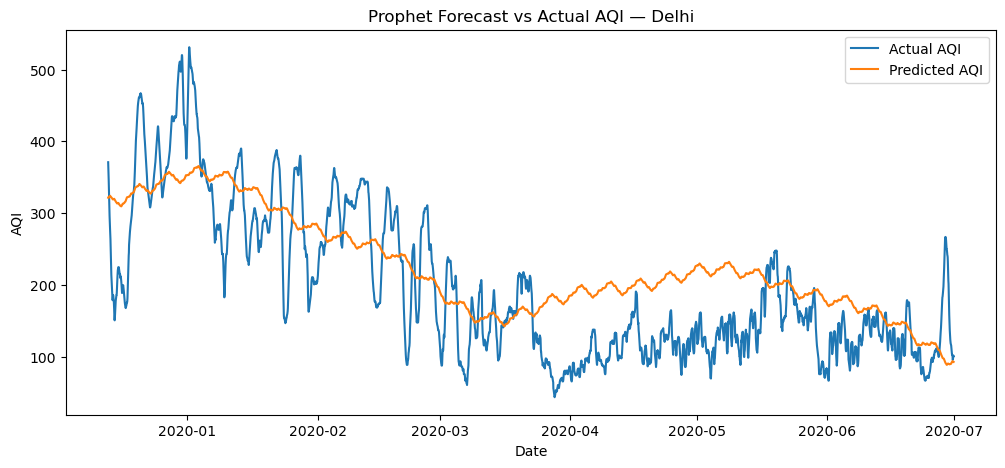

In [25]:
# STEP 3B — Train and evaluate Prophet model for one city (Delhi)

import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("airaware_project/city_hour_final.csv")
df['datetime'] = pd.to_datetime(df['Datetime'], errors='coerce')
df = df.dropna(subset=['datetime']).sort_values('datetime')

#  Filter for one city — Delhi
city_name = "Delhi"
df_city = df[df['City'] == city_name].copy()

if df_city.empty:
    print(f"No data found for {city_name}. Try another city.")
else:
    #  Prepare data for Prophet
    # Prophet needs two columns: ds (datetime) and y (target value)
    df_prophet = df_city[['datetime', 'AQI']].rename(columns={'datetime': 'ds', 'AQI': 'y'})
    df_prophet = df_prophet.dropna()

    #  Split data — last 10% for testing
    n = len(df_prophet)
    test_size = int(n * 0.1)
    train_df = df_prophet.iloc[:-test_size]
    test_df = df_prophet.iloc[-test_size:]

    print(f"Training on {len(train_df)} points, testing on {len(test_df)} points for {city_name}")

    # Initialize and train Prophet model
    model = Prophet(yearly_seasonality=True, daily_seasonality=True)
    model.fit(train_df)

    # Create future dataframe for forecast (same length as test set)
    future = model.make_future_dataframe(periods=len(test_df), freq='H')
    forecast = model.predict(future)

    #  Extract only forecasted values for test period
    forecast_test = forecast.tail(len(test_df))
    y_pred = forecast_test['yhat'].values
    y_true = test_df['y'].values

    # Evaluate using RMSE and MAE
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    mae = mean_absolute_error(y_true, y_pred)
    print(f"\n📊 Prophet results for {city_name}:")
    print(f"RMSE: {rmse:.3f}")
    print(f"MAE : {mae:.3f}")

    # Plot forecast vs actual
    plt.figure(figsize=(12,5))
    plt.plot(test_df['ds'], y_true, label='Actual AQI')
    plt.plot(test_df['ds'], y_pred, label='Predicted AQI')
    plt.title(f'Prophet Forecast vs Actual AQI — {city_name}')
    plt.xlabel('Date')
    plt.ylabel('AQI')
    plt.legend()
    plt.show()


In [26]:
# STEP 3B-Extension — Train Prophet model for every city

import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

#  Load dataset
df = pd.read_csv("airaware_project/city_hour_final.csv")
df['datetime'] = pd.to_datetime(df['Datetime'], errors='coerce')
df = df.dropna(subset=['datetime']).sort_values('datetime')
df = df.set_index('datetime')

target_col = 'AQI'

#  Get list of unique cities
cities = df['City'].dropna().unique()
print(f"Found {len(cities)} cities:", cities[:10], "...")

# Store results
results = []

for city in cities:
    df_city = df[df['City'] == city].copy()
    df_city = df_city.dropna(subset=[target_col])

    if len(df_city) < 200:
        continue

    # Prepare Prophet dataframe
    df_prophet = df_city.reset_index()[['datetime', target_col]].rename(columns={'datetime': 'ds', target_col: 'y'})

    # Split into train/test (last 10% for test)
    n = len(df_prophet)
    test_size = int(n * 0.1)
    train_df = df_prophet.iloc[:-test_size]
    test_df = df_prophet.iloc[-test_size:]

    try:
        model = Prophet(yearly_seasonality=True, daily_seasonality=True)
        model.fit(train_df)

        future = model.make_future_dataframe(periods=len(test_df), freq='H')
        forecast = model.predict(future)
        forecast_test = forecast.tail(len(test_df))

        y_pred = forecast_test['yhat'].values
        y_true = test_df['y'].values

        rmse = mean_squared_error(y_true, y_pred, squared=False)
        mae = mean_absolute_error(y_true, y_pred)

        results.append({'City': city, 'RMSE': rmse, 'MAE': mae, 'DataPoints': len(df_city)})
        print(f" {city:20s} | RMSE={rmse:.2f} | MAE={mae:.2f} | n={len(df_city)}")

    except Exception as e:
        print(f" Skipped {city}: {e}")

#  Combine and show top results
results_df = pd.DataFrame(results).sort_values('RMSE')
print("\nTop 5 cities by lowest RMSE:")
print(results_df.head())

#  Save results for comparison with ARIMA
results_df.to_csv("airaware_project/prophet_city_results.csv", index=False)
print("\n Saved per-city Prophet results to airaware_project/prophet_city_results.csv")


Found 26 cities: ['Ahmedabad' 'Chennai' 'Delhi' 'Lucknow' 'Mumbai' 'Bengaluru' 'Hyderabad'
 'Patna' 'Gurugram' 'Visakhapatnam'] ...


19:42:50 - cmdstanpy - INFO - Chain [1] start processing
19:43:26 - cmdstanpy - INFO - Chain [1] done processing


 Ahmedabad            | RMSE=188.19 | MAE=170.91 | n=48192


19:44:14 - cmdstanpy - INFO - Chain [1] start processing
19:45:53 - cmdstanpy - INFO - Chain [1] done processing


 Chennai              | RMSE=34.17 | MAE=26.56 | n=48192


19:46:42 - cmdstanpy - INFO - Chain [1] start processing
19:47:43 - cmdstanpy - INFO - Chain [1] done processing


 Delhi                | RMSE=73.05 | MAE=61.79 | n=48192


19:48:29 - cmdstanpy - INFO - Chain [1] start processing
19:49:55 - cmdstanpy - INFO - Chain [1] done processing


 Lucknow              | RMSE=69.51 | MAE=56.86 | n=48192


19:50:47 - cmdstanpy - INFO - Chain [1] start processing
19:52:20 - cmdstanpy - INFO - Chain [1] done processing


 Mumbai               | RMSE=40.71 | MAE=35.64 | n=48192


19:53:07 - cmdstanpy - INFO - Chain [1] start processing
19:54:00 - cmdstanpy - INFO - Chain [1] done processing


 Bengaluru            | RMSE=20.40 | MAE=16.44 | n=48192


19:54:44 - cmdstanpy - INFO - Chain [1] start processing
19:56:07 - cmdstanpy - INFO - Chain [1] done processing


 Hyderabad            | RMSE=36.07 | MAE=30.56 | n=48107


19:56:52 - cmdstanpy - INFO - Chain [1] start processing
19:57:56 - cmdstanpy - INFO - Chain [1] done processing


 Patna                | RMSE=61.80 | MAE=42.62 | n=44554


19:58:42 - cmdstanpy - INFO - Chain [1] start processing
20:00:00 - cmdstanpy - INFO - Chain [1] done processing


 Gurugram             | RMSE=70.50 | MAE=60.98 | n=40258


20:00:38 - cmdstanpy - INFO - Chain [1] start processing
20:02:04 - cmdstanpy - INFO - Chain [1] done processing


 Visakhapatnam        | RMSE=66.49 | MAE=59.19 | n=35053


20:02:36 - cmdstanpy - INFO - Chain [1] start processing
20:03:10 - cmdstanpy - INFO - Chain [1] done processing


 Amritsar             | RMSE=80.84 | MAE=69.56 | n=29269


20:03:37 - cmdstanpy - INFO - Chain [1] start processing
20:04:12 - cmdstanpy - INFO - Chain [1] done processing


 Jorapokhar           | RMSE=50.19 | MAE=41.16 | n=28025


20:04:37 - cmdstanpy - INFO - Chain [1] start processing
20:05:08 - cmdstanpy - INFO - Chain [1] done processing


 Jaipur               | RMSE=52.26 | MAE=47.13 | n=26705


20:05:32 - cmdstanpy - INFO - Chain [1] start processing
20:05:52 - cmdstanpy - INFO - Chain [1] done processing


 Thiruvananthapuram   | RMSE=57.56 | MAE=54.09 | n=26651


20:06:12 - cmdstanpy - INFO - Chain [1] start processing
20:06:32 - cmdstanpy - INFO - Chain [1] done processing


 Amaravati            | RMSE=51.39 | MAE=45.06 | n=22784


20:06:51 - cmdstanpy - INFO - Chain [1] start processing
20:07:38 - cmdstanpy - INFO - Chain [1] done processing


 Brajrajnagar         | RMSE=189.47 | MAE=176.44 | n=22468


20:07:52 - cmdstanpy - INFO - Chain [1] start processing
20:08:29 - cmdstanpy - INFO - Chain [1] done processing


 Talcher              | RMSE=154.98 | MAE=151.52 | n=22161


20:08:38 - cmdstanpy - INFO - Chain [1] start processing
20:08:49 - cmdstanpy - INFO - Chain [1] done processing


 Kolkata              | RMSE=82.70 | MAE=78.36 | n=19503


20:08:57 - cmdstanpy - INFO - Chain [1] start processing
20:09:00 - cmdstanpy - INFO - Chain [1] done processing


 Guwahati             | RMSE=34.70 | MAE=30.27 | n=12002


20:09:05 - cmdstanpy - INFO - Chain [1] start processing
20:09:07 - cmdstanpy - INFO - Chain [1] done processing


 Coimbatore           | RMSE=26.96 | MAE=21.91 | n=9229


20:09:11 - cmdstanpy - INFO - Chain [1] start processing
20:09:17 - cmdstanpy - INFO - Chain [1] done processing


 Shillong             | RMSE=436.10 | MAE=317.27 | n=7402


20:09:21 - cmdstanpy - INFO - Chain [1] start processing
20:09:21 - cmdstanpy - INFO - Chain [1] done processing


 Chandigarh           | RMSE=124.54 | MAE=112.11 | n=7263


20:09:25 - cmdstanpy - INFO - Chain [1] start processing
20:09:27 - cmdstanpy - INFO - Chain [1] done processing


 Bhopal               | RMSE=3147.22 | MAE=2427.38 | n=6903


20:09:30 - cmdstanpy - INFO - Chain [1] start processing
20:09:31 - cmdstanpy - INFO - Chain [1] done processing


 Kochi                | RMSE=322.34 | MAE=272.50 | n=3854


20:09:33 - cmdstanpy - INFO - Chain [1] start processing
20:09:34 - cmdstanpy - INFO - Chain [1] done processing


 Ernakulam            | RMSE=175.98 | MAE=149.07 | n=3852


20:09:36 - cmdstanpy - INFO - Chain [1] start processing
20:09:36 - cmdstanpy - INFO - Chain [1] done processing


 Aizawl               | RMSE=53.21 | MAE=40.40 | n=2680

Top 5 cities by lowest RMSE:
          City       RMSE        MAE  DataPoints
5    Bengaluru  20.395692  16.440026       48192
19  Coimbatore  26.958100  21.905520        9229
1      Chennai  34.167039  26.559972       48192
18    Guwahati  34.701044  30.270709       12002
6    Hyderabad  36.067789  30.561848       48107

 Saved per-city Prophet results to airaware_project/prophet_city_results.csv


In [27]:
!pip install xgboost


Defaulting to user installation because normal site-packages is not writeable


Training data shape: (637066, 41)
Testing data shape : (70785, 41)
Training XGBoost model (this may take 1–2 minutes)...
 Training completed!

 XGBoost Results:
RMSE: 33.331
MAE : 22.265


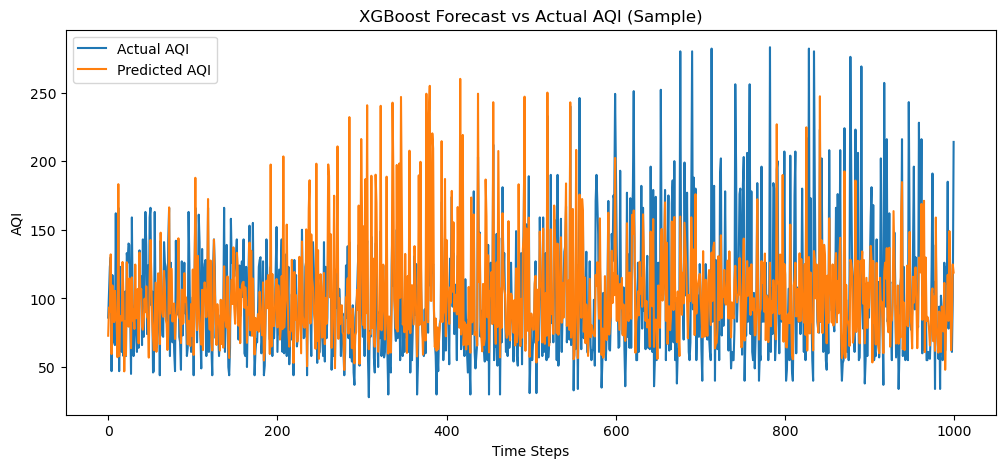

In [33]:
# STEP 3C — Train and evaluate XGBoost model using lag & rolling features (fixed)

import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

#  Load prepared data (from Step 2)
train_df = pd.read_parquet("airaware_project/train_df_step2.parquet")
test_df  = pd.read_parquet("airaware_project/test_df_step2.parquet")

target_col = 'AQI'

#  Remove non-numeric / unwanted columns
drop_cols = ['City', 'Datetime', 'AQI_Bucket']
feature_cols = [c for c in train_df.columns if c not in drop_cols + [target_col]]

# Keep only numeric data
X_train = train_df[feature_cols].select_dtypes(include=['number'])
y_train = train_df[target_col]
X_test  = test_df[feature_cols].select_dtypes(include=['number'])
y_test  = test_df[target_col]

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape : {X_test.shape}")

#  Train XGBoost model
model = xgb.XGBRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

print("Training XGBoost model (this may take 1–2 minutes)...")
model.fit(X_train, y_train)
print(" Training completed!")

#  Make predictions
y_pred = model.predict(X_test)

#  Evaluate performance
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae  = mean_absolute_error(y_test, y_pred)
print(f"\n XGBoost Results:")
print(f"RMSE: {rmse:.3f}")
print(f"MAE : {mae:.3f}")

#  Visualize a small slice
plt.figure(figsize=(12,5))
plt.plot(y_test[:1000].values, label='Actual AQI')
plt.plot(y_pred[:1000], label='Predicted AQI')
plt.title('XGBoost Forecast vs Actual AQI (Sample)')
plt.xlabel('Time Steps')
plt.ylabel('AQI')
plt.legend()
plt.show()


In [34]:
# STEP 4 — Compare ARIMA, Prophet, and XGBoost results

import pandas as pd

# Load saved results
arima_df = pd.read_csv("airaware_project/arima_city_results.csv")
prophet_df = pd.read_csv("airaware_project/prophet_city_results.csv")

# Add XGBoost (single global model)
xgb_row = pd.DataFrame([{
    'City': 'All Cities Combined',
    'RMSE': 33.331,
    'MAE': 22.265,
    'Model': 'XGBoost'
}])

# Add model name columns to ARIMA & Prophet
arima_df['Model'] = 'ARIMA'
prophet_df['Model'] = 'Prophet'

# Combine all results
combined_df = pd.concat([arima_df, prophet_df, xgb_row], ignore_index=True)

# Sort by RMSE
combined_df = combined_df.sort_values('RMSE').reset_index(drop=True)

print("\nFinal Model Comparison — Milestone 2")
print(combined_df[['City', 'Model', 'RMSE', 'MAE']].head(15))

# Save comparison table
combined_df.to_csv("airaware_project/model_comparison_results.csv", index=False)
print("\n Saved comparison table to airaware_project/model_comparison_results.csv")



Final Model Comparison — Milestone 2
                   City    Model       RMSE        MAE
0                Aizawl    ARIMA   1.572857   0.488806
1              Shillong    ARIMA  11.097399   6.583763
2            Coimbatore    ARIMA  12.994832  10.891106
3             Amaravati    ARIMA  16.839158  13.427708
4                 Kochi    ARIMA  18.207294  14.367002
5             Bengaluru  Prophet  20.395692  16.440026
6             Bengaluru    ARIMA  20.608610  16.114979
7            Chandigarh    ARIMA  22.992250  18.926217
8            Coimbatore  Prophet  26.958100  21.905520
9                Bhopal    ARIMA  28.361357  25.047208
10               Jaipur    ARIMA  29.120995  21.570788
11            Hyderabad    ARIMA  31.117025  23.989629
12  All Cities Combined  XGBoost  33.331000  22.265000
13              Chennai  Prophet  34.167039  26.559972
14             Guwahati  Prophet  34.701044  30.270709

 Saved comparison table to airaware_project/model_comparison_results.csv


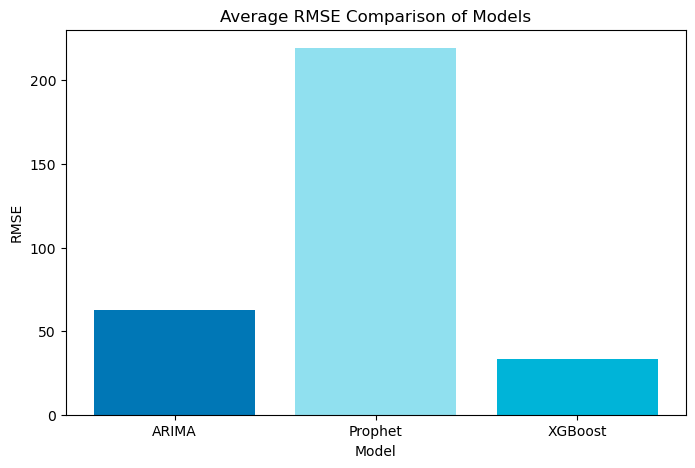

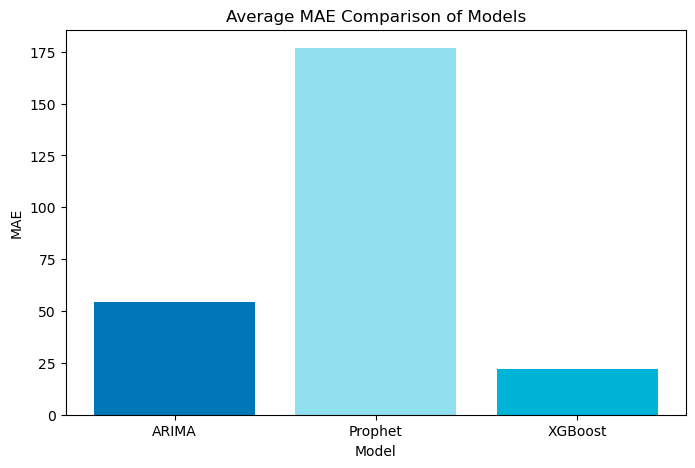

In [35]:
# STEP 5 — Graphical comparison of models

import pandas as pd
import matplotlib.pyplot as plt

# Load the comparison results
comparison_df = pd.read_csv("airaware_project/model_comparison_results.csv")

# We'll take a few representative models to visualize
plot_df = comparison_df.groupby('Model')[['RMSE', 'MAE']].mean().reset_index()

plt.figure(figsize=(8,5))
plt.bar(plot_df['Model'], plot_df['RMSE'], color=['#0077b6','#90e0ef','#00b4d8'])
plt.title('Average RMSE Comparison of Models')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.show()

plt.figure(figsize=(8,5))
plt.bar(plot_df['Model'], plot_df['MAE'], color=['#0077b6','#90e0ef','#00b4d8'])
plt.title('Average MAE Comparison of Models')
plt.xlabel('Model')
plt.ylabel('MAE')
plt.show()


In [37]:
# # STEP 7 — Save the best model (XGBoost)
# import joblib
# import xgboost as xgb
# import pandas as pd

# train_df = pd.read_parquet("/mnt/data/train_df_step2.parquet")
# target_col = 'AQI'

# X_train = train_df.drop(columns=['City','Datetime','AQI_Bucket',target_col]).select_dtypes(include=['number'])
# y_train = train_df[target_col]

# best_model = xgb.XGBRegressor(
#     n_estimators=200,
#     learning_rate=0.05,
#     max_depth=6,
#     subsample=0.8,
#     colsample_bytree=0.8,
#     random_state=42
# )
# best_model.fit(X_train, y_train)

# joblib.dump(best_model, "best_model_xgboost.pkl")
# print("Best model (XGBoost) saved as best_model_xgboost.pkl")


Training data shape: (637066, 41)
Testing data shape : (70785, 41)
Training XGBoost model (this may take 1–2 minutes)...
 Training completed!

 XGBoost Model Evaluation:
RMSE: 33.331
MAE : 22.265


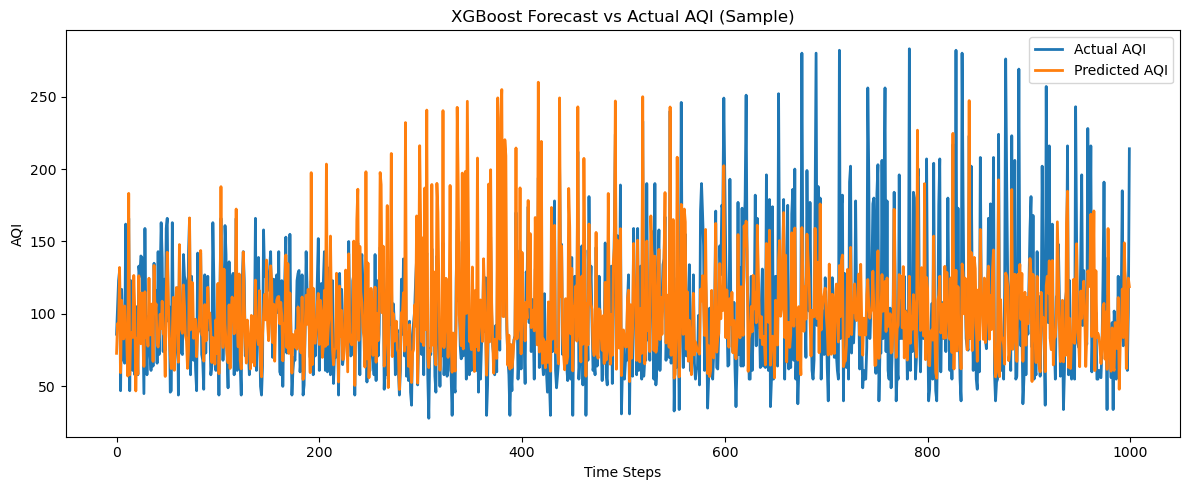


💾 Model saved successfully as 'best_model_xgboost.pkl'


In [39]:
# STEP — Train, Evaluate & Save XGBoost Model

import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import joblib

# -------------------------
#  Load Prepared Data
# -------------------------
train_df = pd.read_parquet("airaware_project/train_df_step2.parquet")
test_df  = pd.read_parquet("airaware_project/test_df_step2.parquet")

target_col = 'AQI'
drop_cols = ['City', 'Datetime', 'AQI_Bucket']

# -------------------------
# Prepare Features & Target
# -------------------------
feature_cols = [c for c in train_df.columns if c not in drop_cols + [target_col]]

# Keep only numeric features
X_train = train_df[feature_cols].select_dtypes(include=['number'])
y_train = train_df[target_col]
X_test  = test_df[feature_cols].select_dtypes(include=['number'])
y_test  = test_df[target_col]

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape : {X_test.shape}")

# -------------------------
#  Train XGBoost Model
# -------------------------
model = xgb.XGBRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

print("Training XGBoost model (this may take 1–2 minutes)...")
model.fit(X_train, y_train)
print(" Training completed!")

# -------------------------
#  Evaluate Performance
# -------------------------
y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
mae  = mean_absolute_error(y_test, y_pred)

print("\n XGBoost Model Evaluation:")
print(f"RMSE: {rmse:.3f}")
print(f"MAE : {mae:.3f}")

# -------------------------
# Visualization
# -------------------------
plt.figure(figsize=(12,5))
plt.plot(y_test[:1000].values, label='Actual AQI', linewidth=2)
plt.plot(y_pred[:1000], label='Predicted AQI', linewidth=2)
plt.title('XGBoost Forecast vs Actual AQI (Sample)')
plt.xlabel('Time Steps')
plt.ylabel('AQI')
plt.legend()
plt.tight_layout()
plt.show()

# -------------------------
# Save Trained Model
# -------------------------
joblib.dump(model, "airaware_project/best_model_xgboost.pkl")
print("\n💾 Model saved successfully as 'best_model_xgboost.pkl'")
